In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = cv2.imread('../images/sakura.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [2]:
'''
cv2.threshold参数:
    gray:  输入的灰度图像。
    0:     设定的阈值,这里设定为0,阈值由大津法求得，这个参数不起作用。
    255:   设定的最大像素值,这里表示二值化后的像素值为255。
    cv2.THRESH_BINARY + cv2.THRESH_OTSU:阈值处理的类型,这里使用了两种类型的组合。cv2.THRESH_BINARY表示二值化处理,cv2.THRESH_OTSU表示使用Otsu算法自动计算阈值。
    
返回值: 在给定参数cv2.THRESH_OTSU时,返回值为元组,SEG1[0]为OSTU算法计算的阈值,SEG1[1]为分割的图像
'''
SEG1 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
SEG1 = SEG1[1]

In [3]:
'''
cv2.adaptiveThreshold参数:
    gray:   输入的灰度图像。
    255:    设定的最大像素值,这里表示二值化后的像素值为255。
    cv2.ADAPTIVE_THRESH_MEAN_C: 自适应阈值处理的方法,用局部均值作为阈值。
    cv2.THRESH_BINARY:          阈值处理的类型,这里是二值化处理。
    51:     自适应阈值的邻域大小,表示在每个像素周围51x51的邻域内计算局部均值。
    2:      阈值的偏移量,用于调整阈值的大小。
返回值: 为分割的图像    
'''
# 自适应阈值的邻域大小(blockSize)要选取的足够大，才能够取得比较好的成果
SEG2 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, 2)
SEG3 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 2)

(-0.5, 1079.5, 601.5, -0.5)

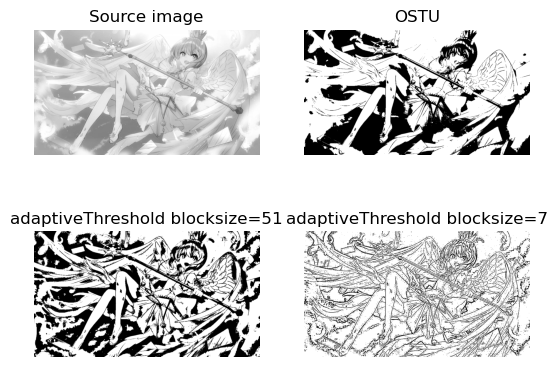

In [4]:
figure = plt.figure()
plt.subplot(221)
plt.imshow(gray, cmap='gray',)
plt.title('Source image')
plt.axis('off')
plt.subplot(222)
plt.imshow(SEG1, cmap='gray',)
plt.title('OSTU')
plt.axis('off')
plt.subplot(223)
plt.imshow(SEG2, cmap='gray')
plt.title('adaptiveThreshold blocksize=51')
plt.axis('off')
plt.subplot(224)
plt.imshow(SEG3, cmap='gray')
plt.title('adaptiveThreshold blocksize=7')
plt.axis('off')